In [1]:
import pandas as pd
df = pd.read_csv(r"Datasets\Social_Network_Ads.csv")
df.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
5,15728773,Male,27.0,58000.0,0
6,15598044,Female,27.0,84000.0,0
7,15694829,Female,32.0,150000.0,1
8,15600575,Male,25.0,33000.0,0
9,15727311,Female,35.0,65000.0,0


In [2]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

C:\Users\mehul\AppData\Local\Temp\ipykernel_16324\785912294.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


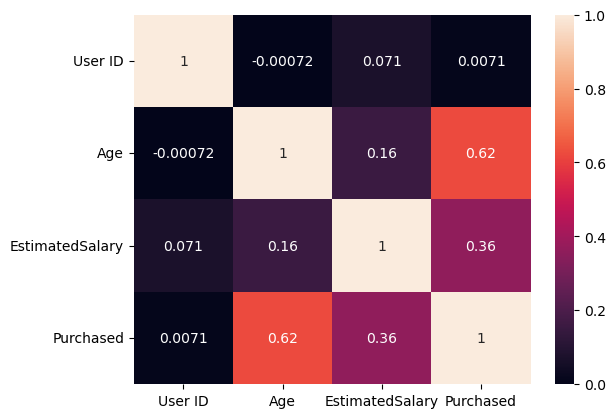

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.heatmap(df.corr(),annot=True) 
plt.show()

In [5]:
# Choosing input and output variables from correlation matrix 
X = df[['Age','EstimatedSalary']] #input variables 
y = df['Purchased'] #output variable 


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [8]:
from sklearn.linear_model import LogisticRegression 

model = LogisticRegression(solver = 'lbfgs') 
model = model.fit(X_train,y_train) 
y_pred = model.predict(X_test) 


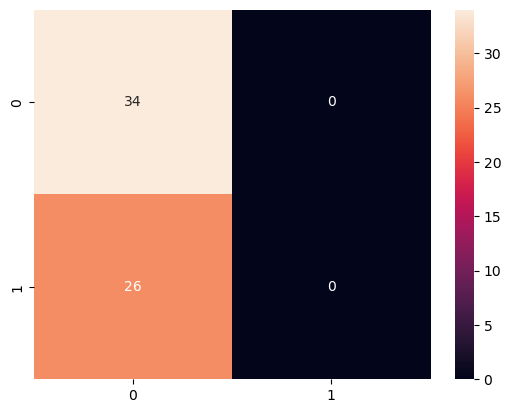

In [9]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm, annot=True) 
plt.show() 


In [15]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      1.00      0.72        34
           1       0.00      0.00      0.00        26

    accuracy                           0.57        60
   macro avg       0.28      0.50      0.36        60
weighted avg       0.32      0.57      0.41        60



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


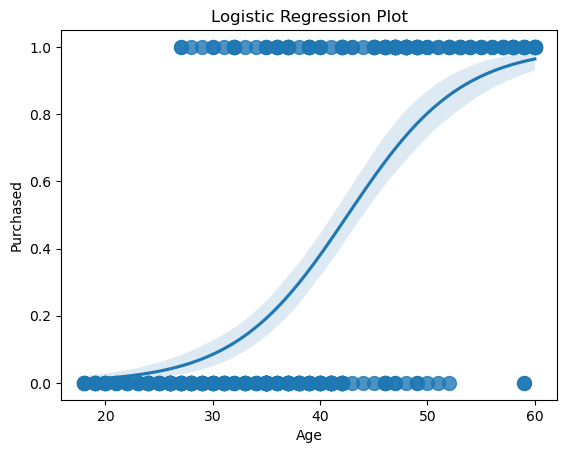

In [13]:
sns.regplot(x=df['Age'], y=y, logistic=True, scatter_kws={"s": 100})

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Purchased')
plt.title('Logistic Regression Plot')

# Show plot
plt.show()